In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from collections import Counter
import matplotlib.ticker as mtick

# Predicting Customer Satisfaction - Ecommerce Data¶
Olist has released a dataset of 100k orders made between 2016 and 2018. Lets create a model to predict what's the score a customer will give for an order.

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Global Tech\Downloads\olist_public_dataset_v2.csv\olist_public_dataset_v2.csv")
df.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [3]:
print(df.shape)
print(df.describe())

(100000, 25)
       order_products_value  order_freight_value  order_items_qty  \
count         100000.000000        100000.000000    100000.000000   
mean             129.191704            21.739202         1.100090   
std              194.863060            20.088368         0.459189   
min                2.000000             0.000000         1.000000   
25%               46.990000            13.470000         1.000000   
50%               83.650000            16.790000         1.000000   
75%              145.900000            23.010000         1.000000   
max            13440.000000          1562.100000        20.000000   

       order_sellers_qty  customer_zip_code_prefix  product_name_lenght  \
count      100000.000000             100000.000000        100000.000000   
mean            1.141690                353.768400            48.839630   
std             0.708829                297.682699            10.139335   
min             1.000000                 10.000000             5.

# EDA

In [4]:
# Data types and missing values
print("\nData types:")
print(df.dtypes)
print("\nMissing values by column:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                          'Percentage': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))


Data types:
order_id                          object
order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_id                       object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
product_id                        object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
rev

In [5]:
df1 = df.copy()
df1.drop(columns=['review_comment_title'], inplace=True)

In [6]:
#filling missing data
df1 = df1.assign(review_comment_message=df1['review_comment_message'].fillna('No review message'))



df1['order_delivered_customer_date'] = pd.to_datetime(df1['order_delivered_customer_date'])


In [7]:
# Convert date columns to datetime
date_columns = ['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                'order_delivered_customer_date', 'review_creation_date', 'review_answer_timestamp']
for col in date_columns:
    df1[col] = pd.to_datetime(df1[col], errors='coerce')

Date columns found: ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'review_creation_date', 'review_answer_timestamp']
Extracted columns: order_purchase_timestamp_year, order_purchase_timestamp_month, order_purchase_timestamp_day


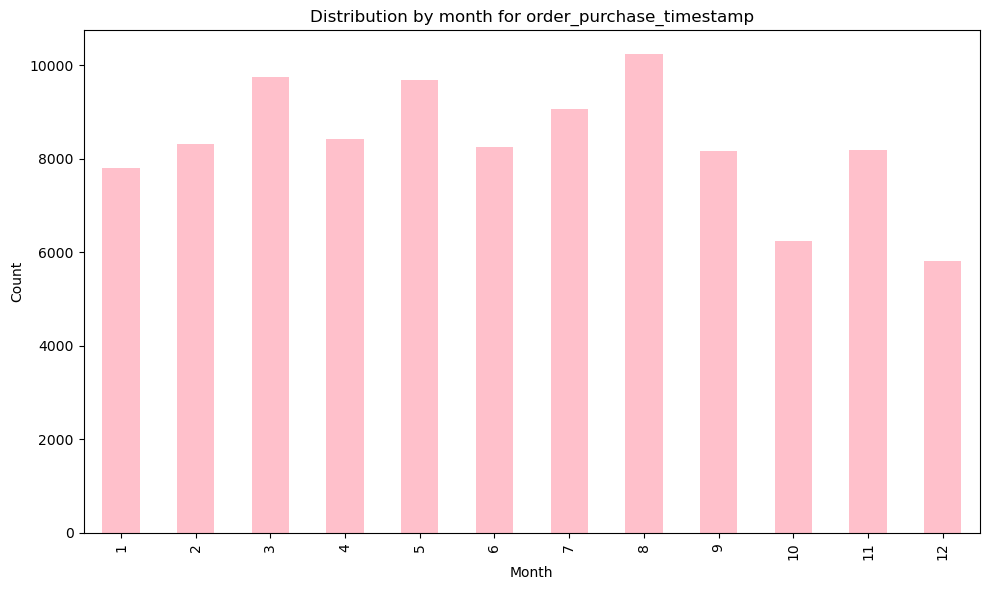

Extracted columns: order_estimated_delivery_date_year, order_estimated_delivery_date_month, order_estimated_delivery_date_day


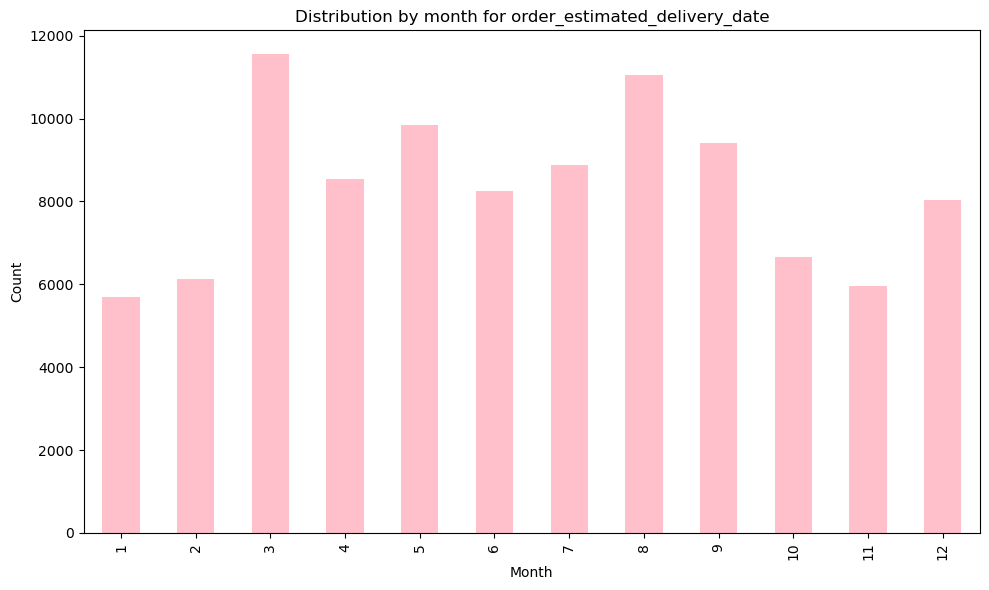

Extracted columns: order_delivered_customer_date_year, order_delivered_customer_date_month, order_delivered_customer_date_day


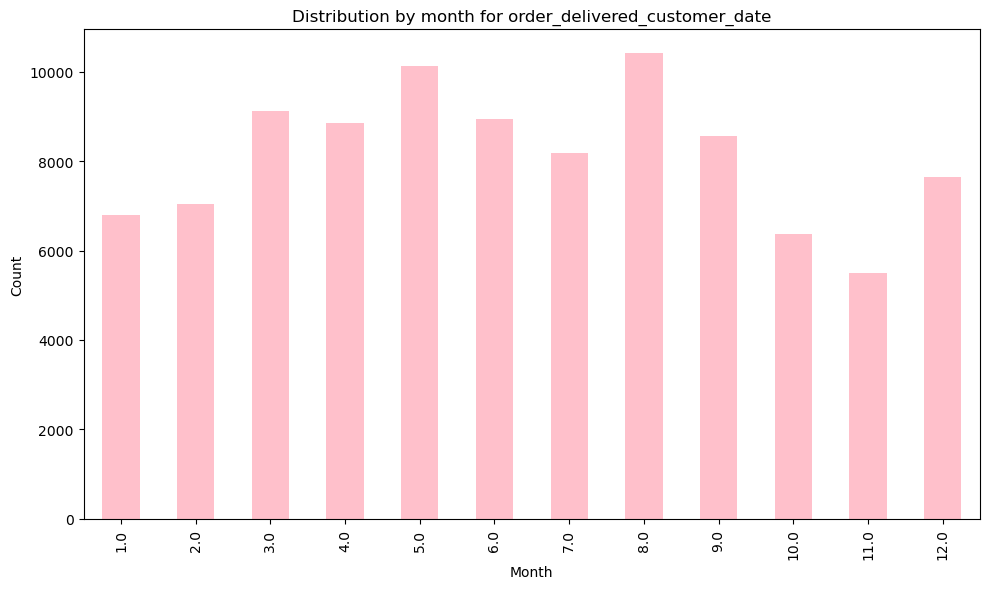

Extracted columns: review_creation_date_year, review_creation_date_month, review_creation_date_day


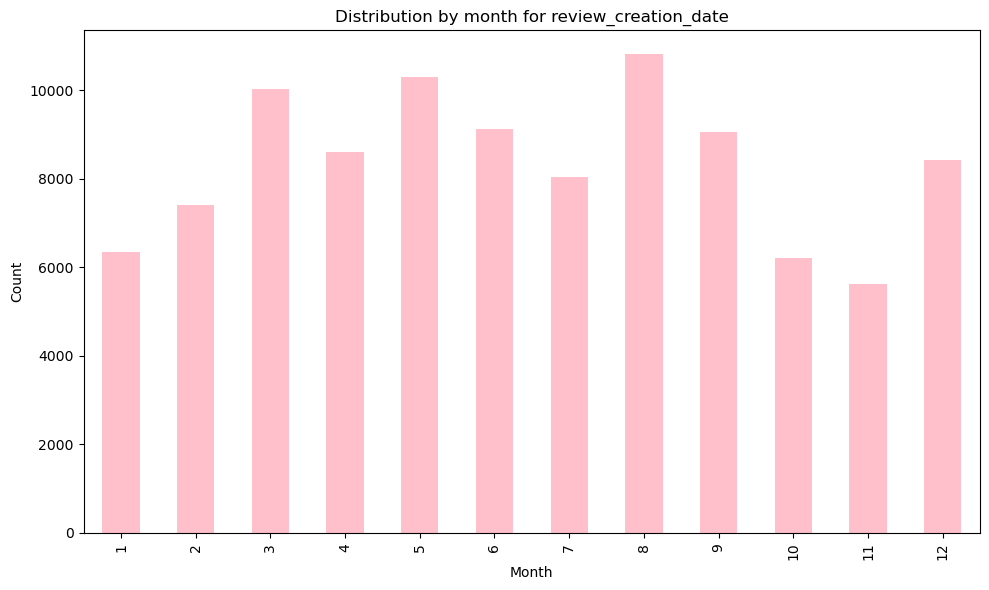

Extracted columns: review_answer_timestamp_year, review_answer_timestamp_month, review_answer_timestamp_day


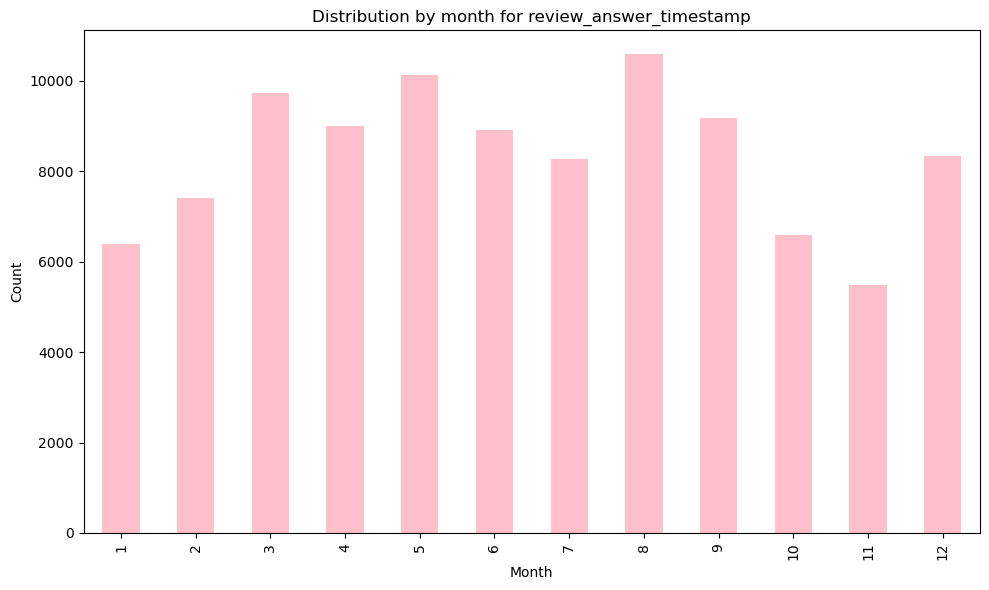

In [8]:


# Identify date/time columns
date_cols = [col for col in df1.columns if 'date' in col.lower() or 'time' in col.lower()]
print("Date columns found:", date_cols)

if date_cols:
    for date_col in date_cols:
        if df1[date_col].dtype == 'object':  
            try:
                df1[date_col] = pd.to_datetime(df1[date_col], errors='coerce')
                print(f"Converted {date_col} to datetime")
            except Exception as e:
                print(f"Error converting {date_col}: {e}")
                continue  # Skip to the next column

        # Check if conversion was successful
        if pd.api.types.is_datetime64_any_dtype(df1[date_col]):
            df1[f'{date_col}_year'] = df1[date_col].dt.year
            df1[f'{date_col}_month'] = df1[date_col].dt.month
            df1[f'{date_col}_day'] = df1[date_col].dt.day

            # Debugging: Check extracted columns
            print(f"Extracted columns: {date_col}_year, {date_col}_month, {date_col}_day")

            # Ensure column exists before plotting
            extracted_col = f"{date_col}_month"
            if extracted_col in df1.columns:
                plt.figure(figsize=(10, 6))
                df1[extracted_col].value_counts().sort_index().plot(kind='bar', color="pink")
                plt.title(f'Distribution by month for {date_col}')
                plt.xlabel('Month')
                plt.ylabel('Count')
                plt.tight_layout()
                plt.show()
            else:
                print(f"Skipping plot: {extracted_col} does not exist.")
        else:
            print(f"Skipping {date_col} as it was not converted to datetime.")


## order analysis



Order Status Distribution:
order_status
delivered      97590
shipped         1190
canceled         486
processing       392
invoiced         331
unavailable        9
approved           2
Name: count, dtype: int64


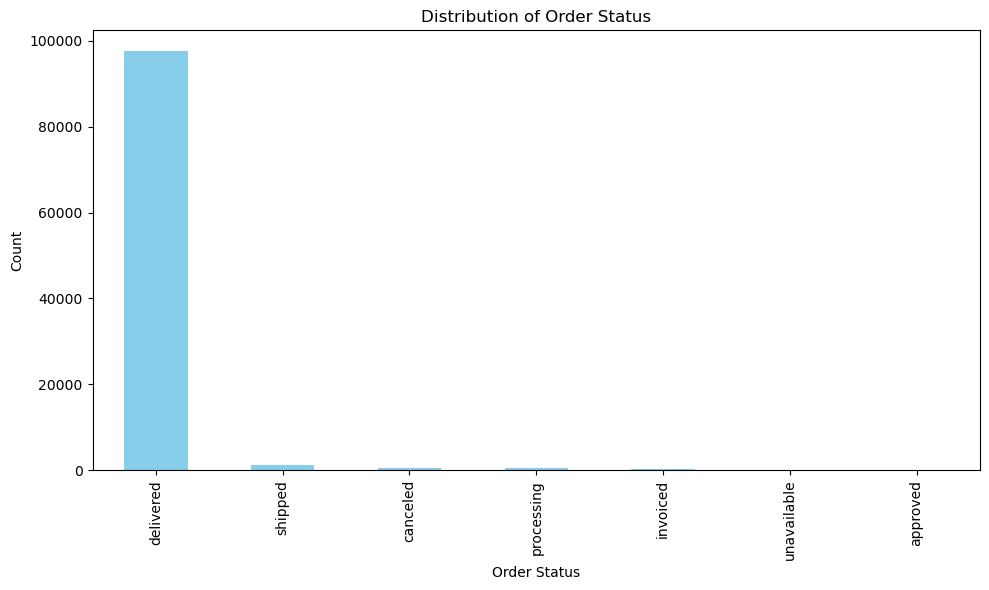

In [9]:
print("\nOrder Status Distribution:")
status_counts = df['order_status'].value_counts()
print(status_counts)

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


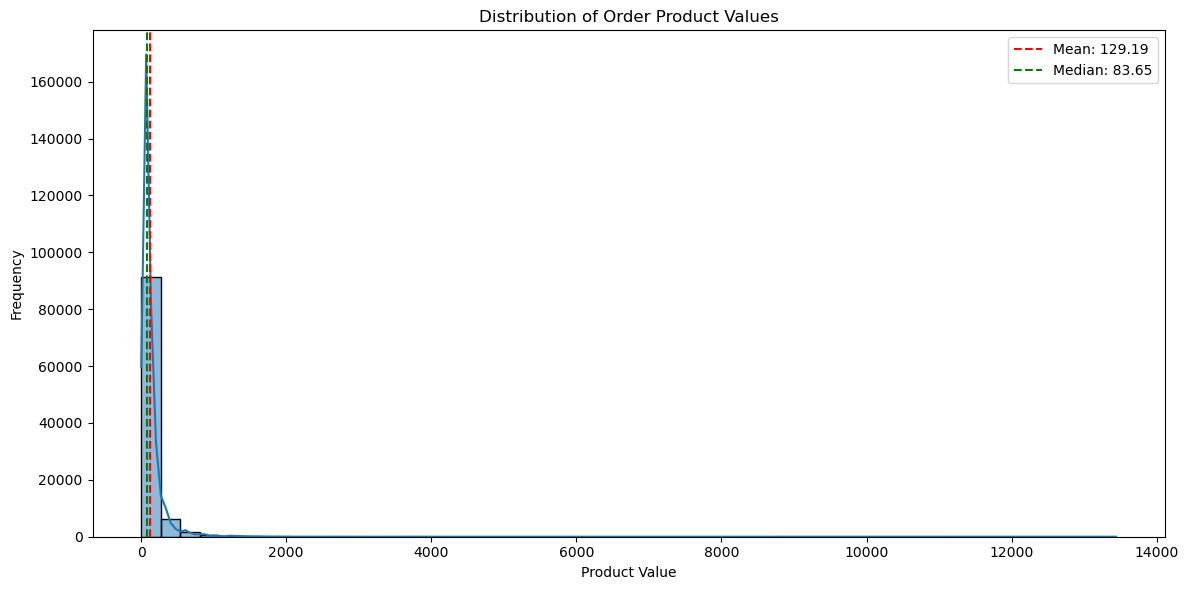

In [10]:
# Product value analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['order_products_value'], bins=50, kde=True)
plt.title('Distribution of Order Product Values')
plt.xlabel('Product Value')
plt.ylabel('Frequency')
plt.axvline(df['order_products_value'].mean(), color='red', linestyle='--', label=f'Mean: {df["order_products_value"].mean():.2f}')
plt.axvline(df['order_products_value'].median(), color='green', linestyle='--', label=f'Median: {df["order_products_value"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

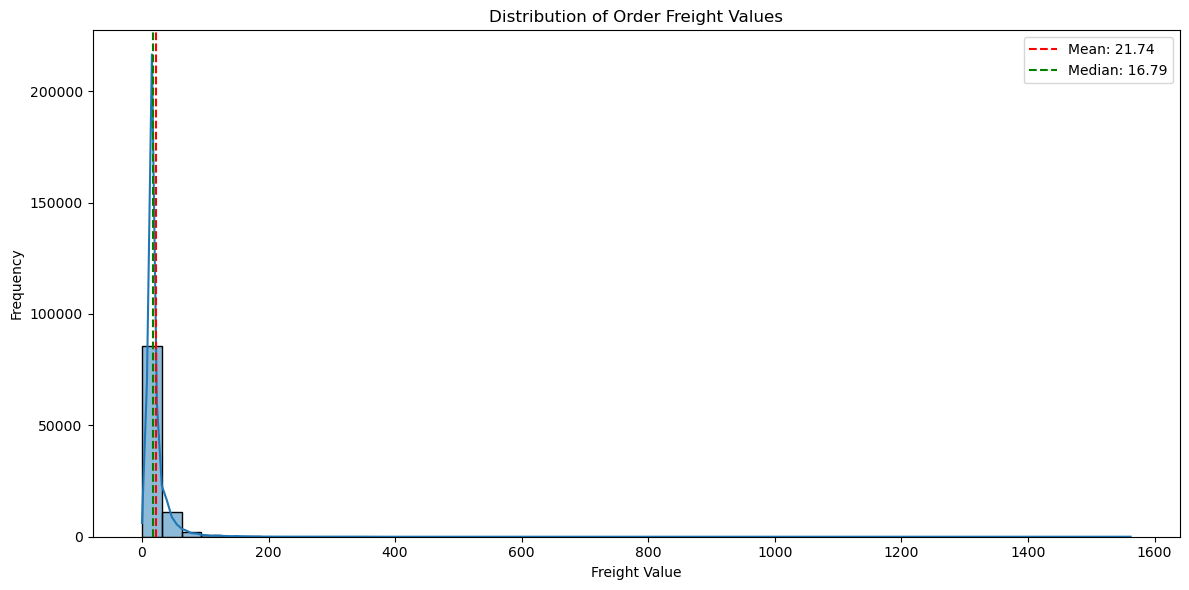

In [11]:
# Freight value analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['order_freight_value'], bins=50, kde=True)
plt.title('Distribution of Order Freight Values')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.axvline(df['order_freight_value'].mean(), color='red', linestyle='--', label=f'Mean: {df["order_freight_value"].mean():.2f}')
plt.axvline(df['order_freight_value'].median(), color='green', linestyle='--', label=f'Median: {df["order_freight_value"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()


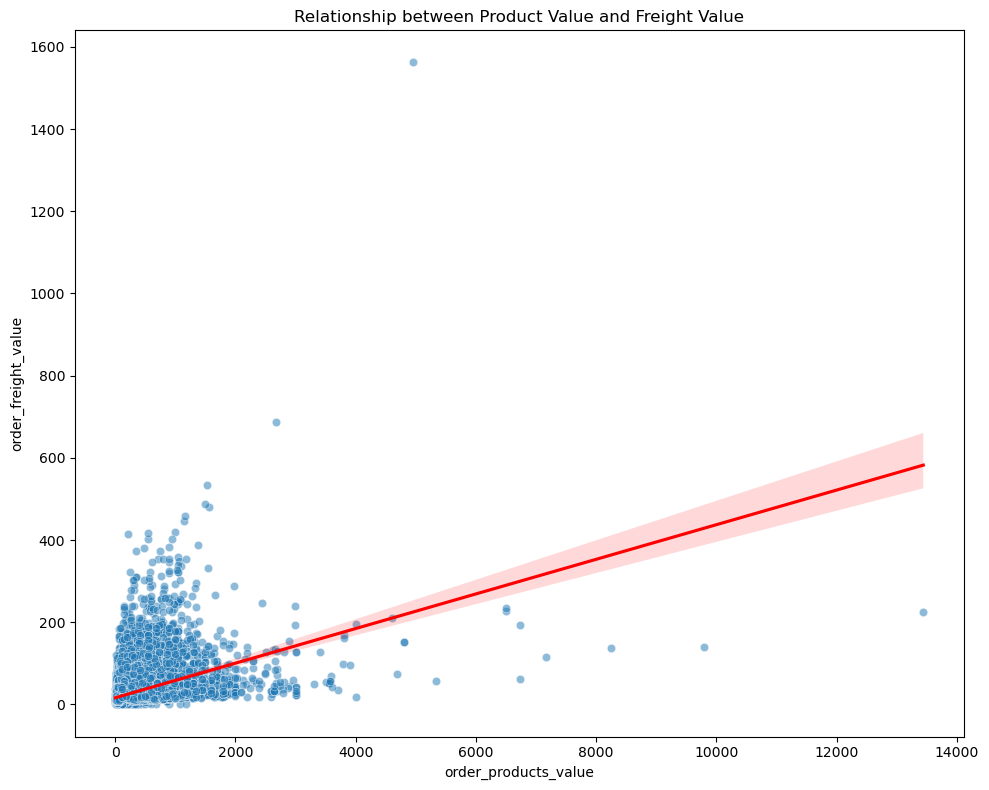

In [12]:
# Relationship between product value and freight value
plt.figure(figsize=(10, 8))
sns.scatterplot(x='order_products_value', y='order_freight_value', data=df, alpha=0.5)
plt.title('Relationship between Product Value and Freight Value')
plt.xlabel('Product Value')
plt.ylabel('Freight Value')
# Add trend line
sns.regplot(x='order_products_value', y='order_freight_value', data=df, scatter=False, color='red')
plt.tight_layout()
plt.show()

# Geographical analysis

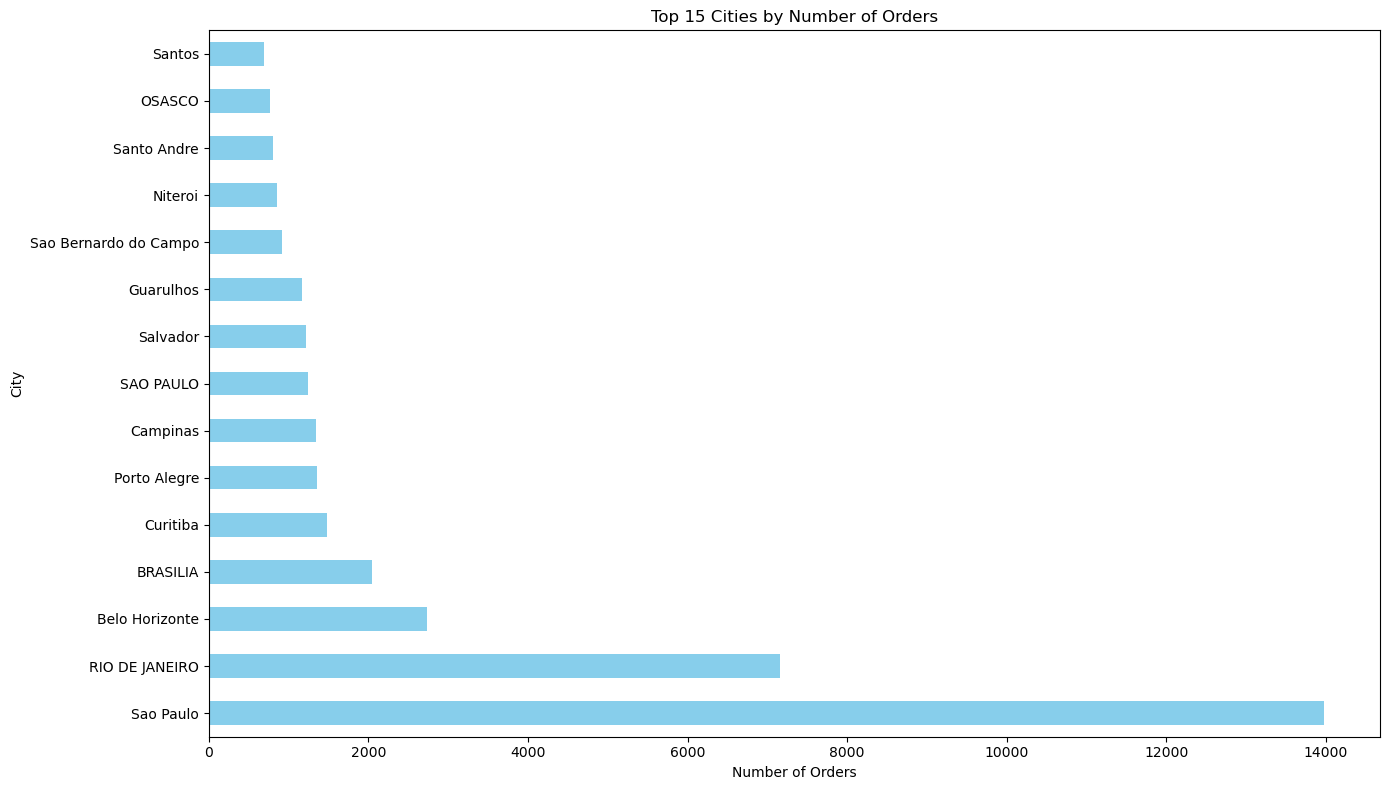

In [13]:
# Top cities
plt.figure(figsize=(14, 8))
city_counts = df['customer_city'].value_counts().head(15)
city_counts.plot(kind='barh', color='skyblue')
plt.title('Top 15 Cities by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.tight_layout()
plt.show()

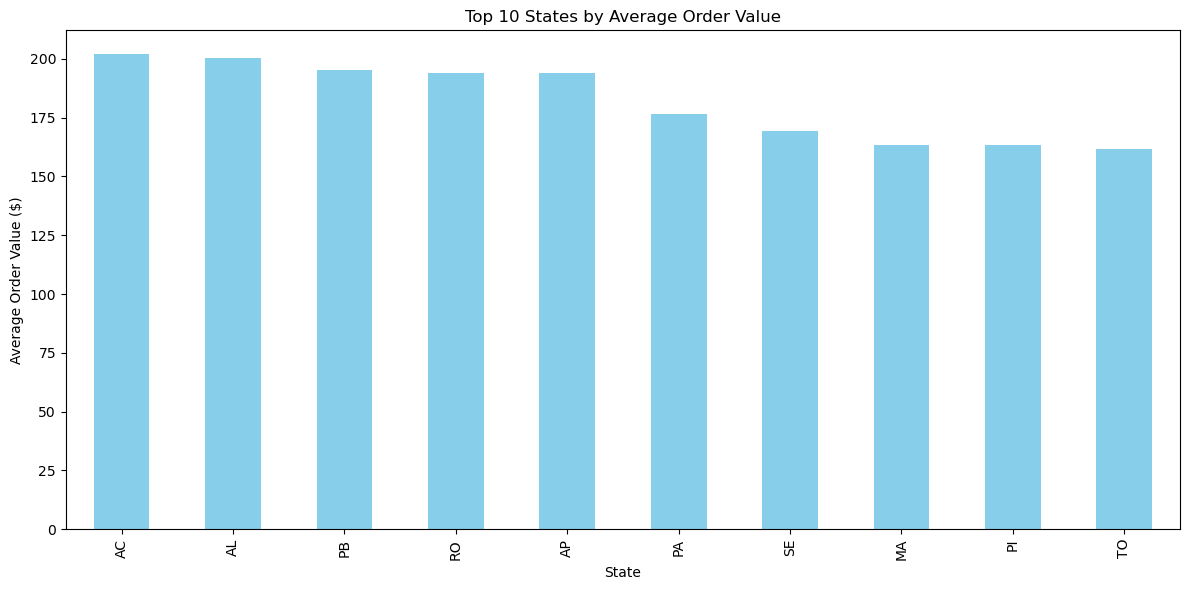

In [14]:
# Average order value by state
state_avg_value = df.groupby('customer_state')['order_products_value'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_avg_value.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Average Order Value')
plt.xlabel('State')
plt.ylabel('Average Order Value ($)')
plt.tight_layout()
plt.show()

## time analysis

In [15]:
# Extract time components
df1['purchase_year'] = df1['order_purchase_timestamp'].dt.year
df1['purchase_month'] = df1['order_purchase_timestamp'].dt.month
df1['purchase_day'] = df1['order_purchase_timestamp'].dt.day
df1['purchase_hour'] = df1['order_purchase_timestamp'].dt.hour
df1['purchase_dayofweek'] = df1['order_purchase_timestamp'].dt.dayofweek






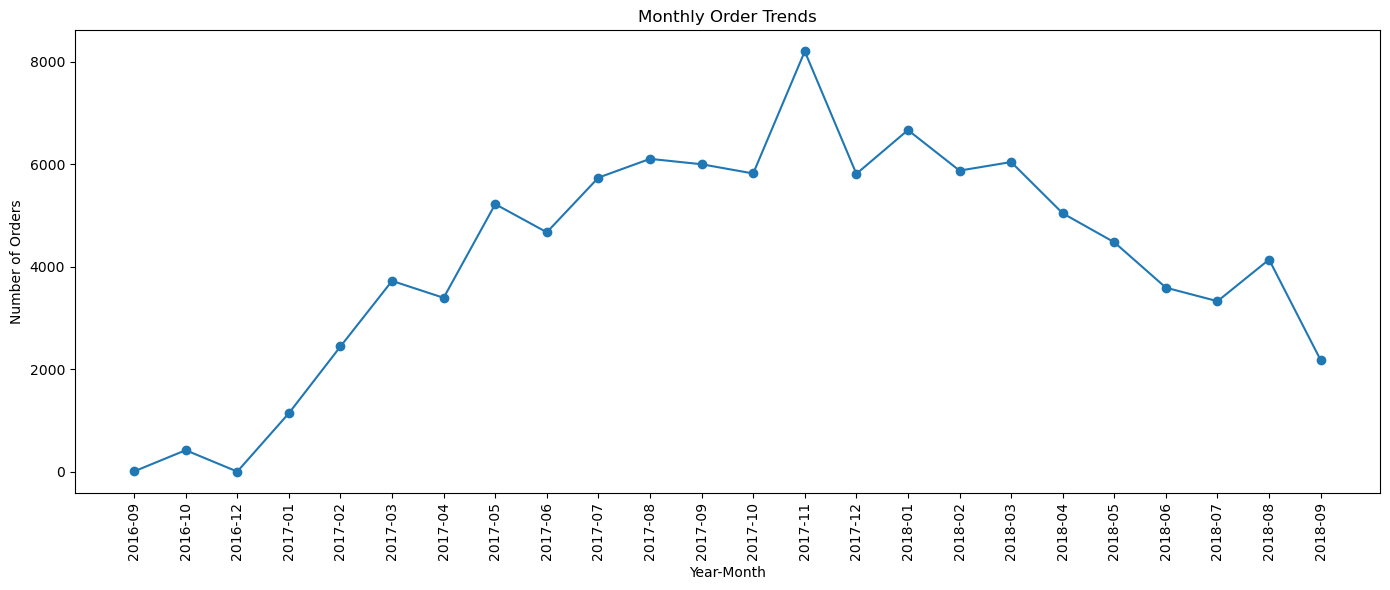

In [16]:


# Monthly trends
monthly_orders = df1.groupby(['purchase_year', 'purchase_month']).size().reset_index(name='order_count')
monthly_orders['year_month'] = monthly_orders['purchase_year'].astype(str) + '-' + monthly_orders['purchase_month'].astype(str).str.zfill(2)
monthly_orders = monthly_orders.sort_values(['purchase_year', 'purchase_month'])

plt.figure(figsize=(14, 6))
plt.plot(monthly_orders['year_month'], monthly_orders['order_count'], marker='o')
plt.title('Monthly Order Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

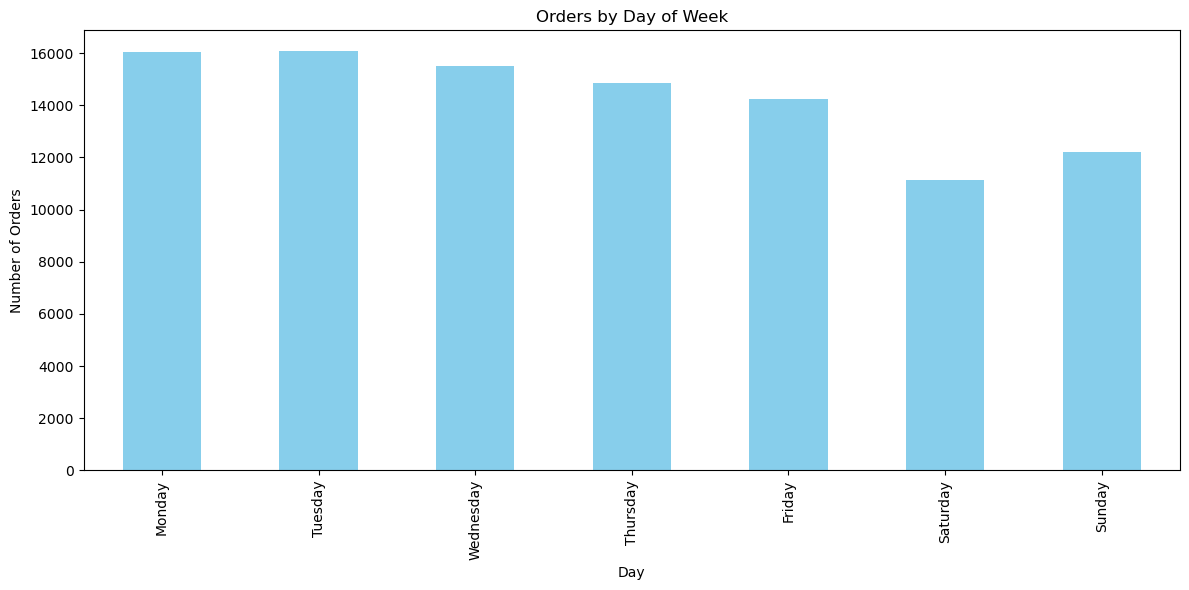

In [17]:
# Day of week analysis
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df1['purchase_dayofweek'].value_counts().sort_index()
day_counts.index = [days[i] for i in day_counts.index]

plt.figure(figsize=(12, 6))
day_counts.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


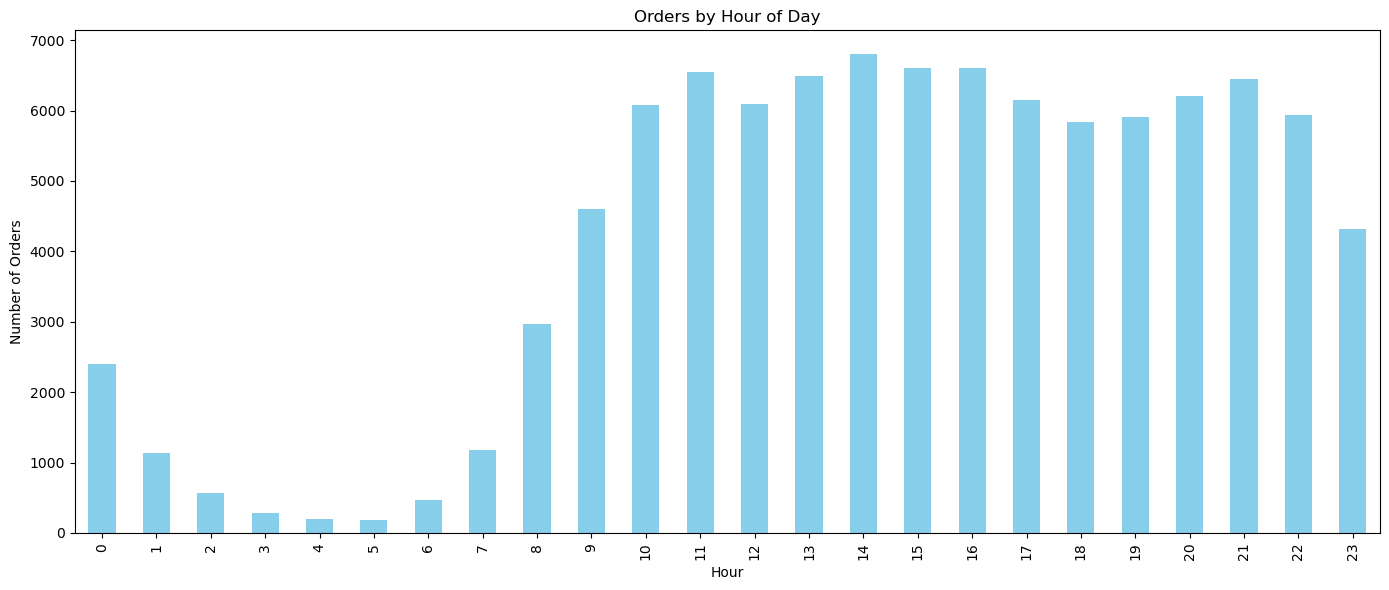

In [18]:
# Hour of day analysis
hour_counts = df1['purchase_hour'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [19]:
# delivery analysis
df1['actual_delivery_days'] = (df1['order_delivered_customer_date'] - df1['order_purchase_timestamp']).dt.days
df1['estimated_delivery_days'] = (df1['order_estimated_delivery_date'] - df1['order_purchase_timestamp']).dt.days
df1['delivery_difference'] = df1['actual_delivery_days'] - df1['estimated_delivery_days']


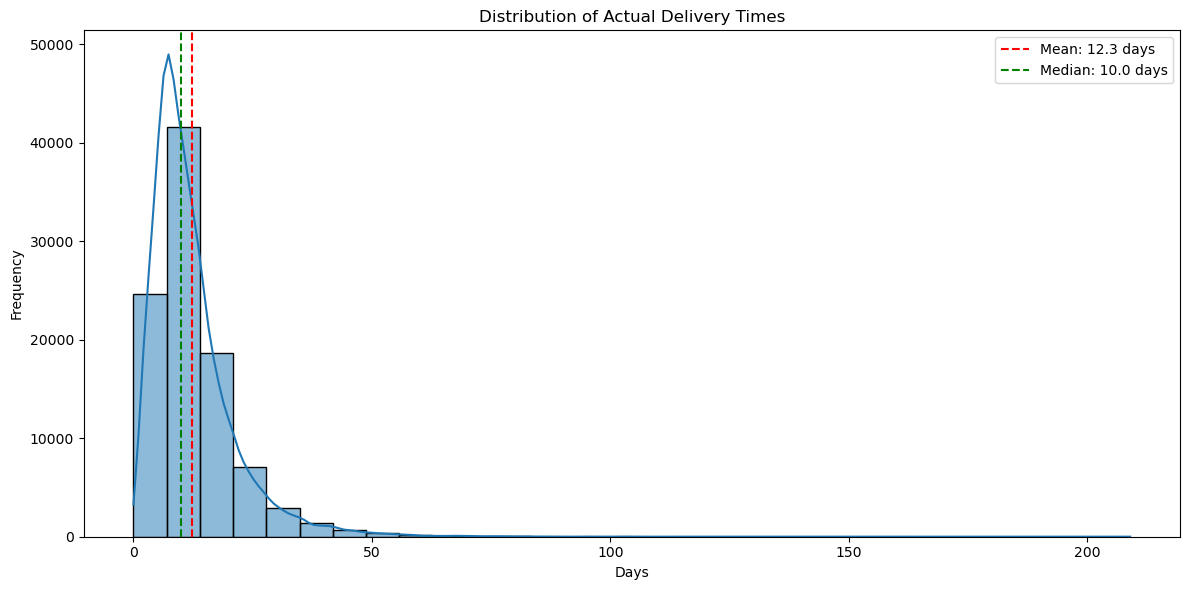

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df1['actual_delivery_days'].dropna(), bins=30, kde=True)
plt.title('Distribution of Actual Delivery Times')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.axvline(df1['actual_delivery_days'].mean(), color='red', linestyle='--', label=f'Mean: {df1["actual_delivery_days"].mean():.1f} days')
plt.axvline(df1['actual_delivery_days'].median(), color='green', linestyle='--', label=f'Median: {df1["actual_delivery_days"].median():.1f} days')
plt.legend()
plt.tight_layout()
plt.show()


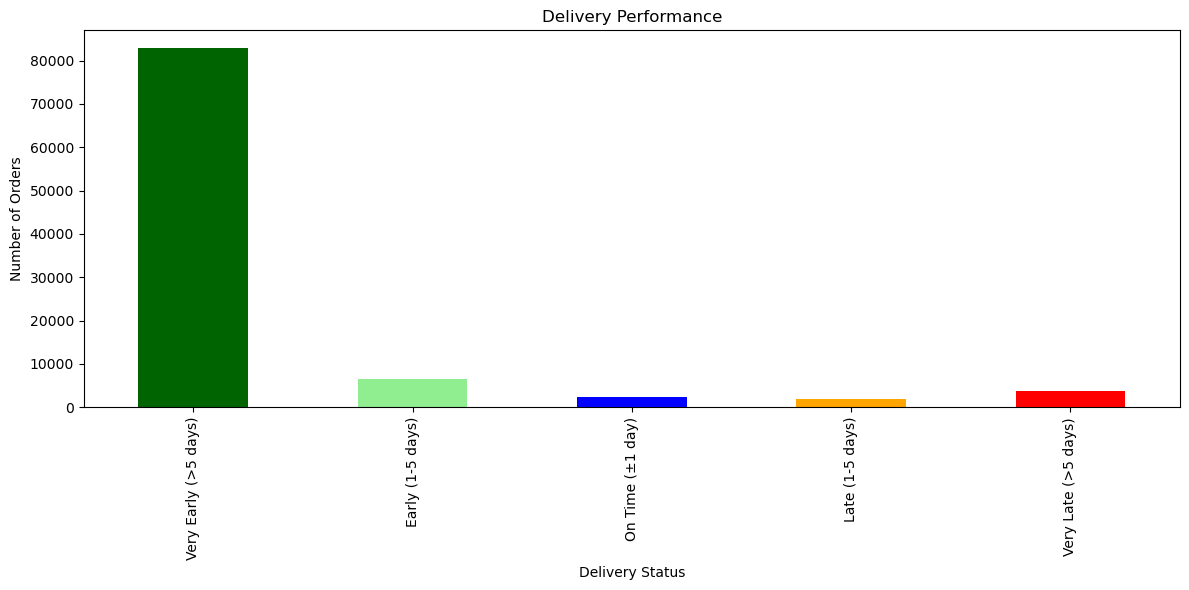

In [21]:
#early vs late deliveries
df1['delivery_status'] = pd.cut(
    df1['delivery_difference'],
    bins=[-float('inf'), -5, -1, 1, 5, float('inf')],
    labels=['Very Early (>5 days)', 'Early (1-5 days)', 'On Time (±1 day)', 'Late (1-5 days)', 'Very Late (>5 days)']
)

delivery_status_counts = df1['delivery_status'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
delivery_status_counts.plot(kind='bar', color=['darkgreen', 'lightgreen', 'blue', 'orange', 'red'])
plt.title('Delivery Performance')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


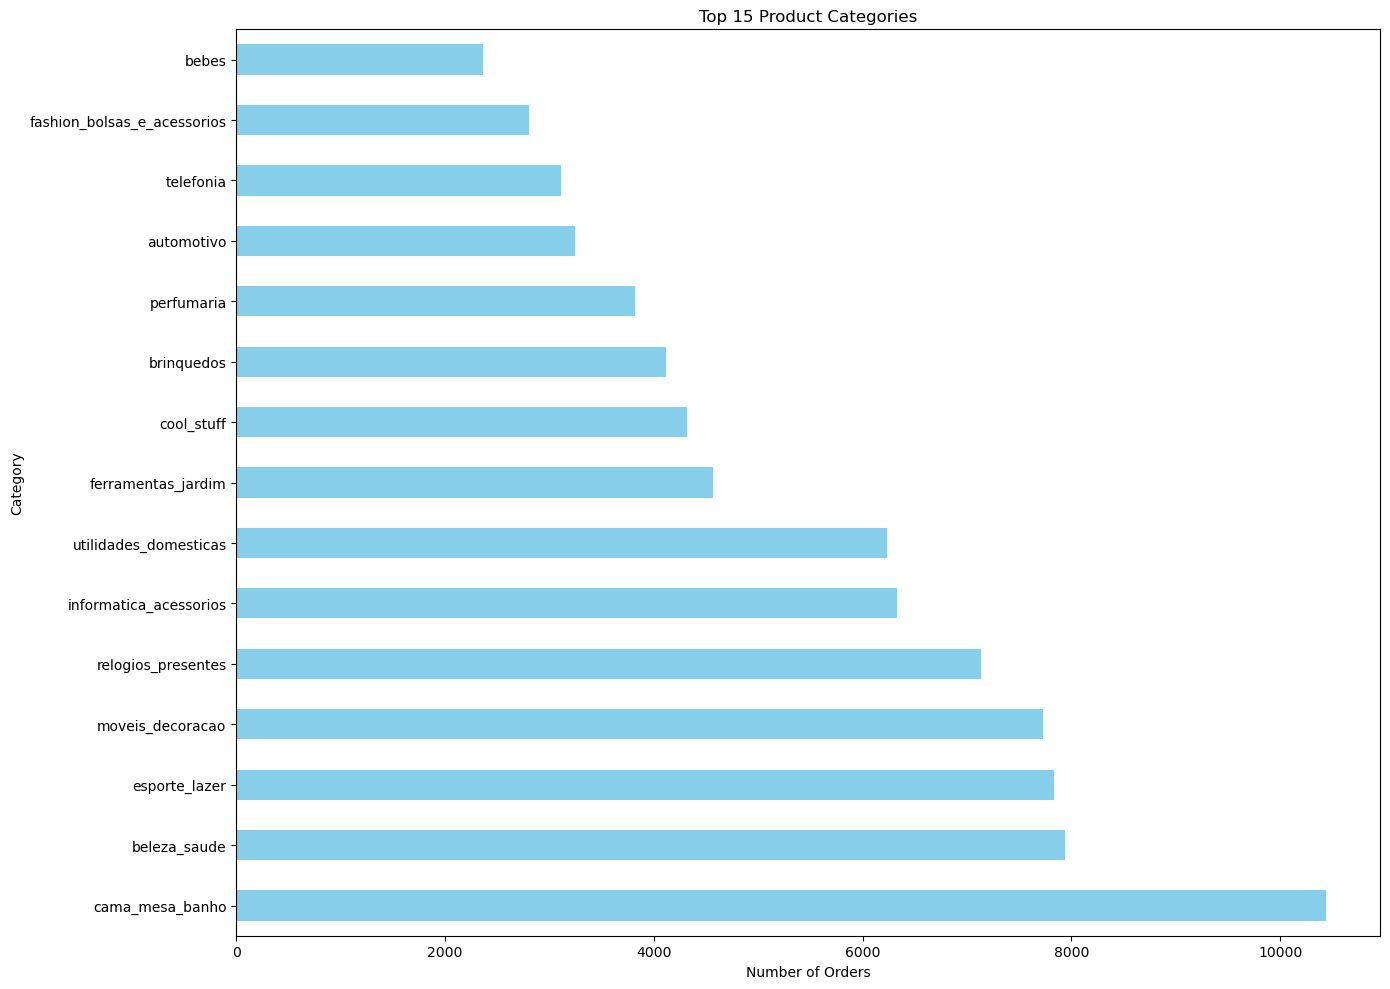

In [22]:
#product analysis
plt.figure(figsize=(14, 10))
category_counts = df1['product_category_name'].value_counts().head(15)
category_counts.plot(kind='barh', color='skyblue')
plt.title('Top 15 Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


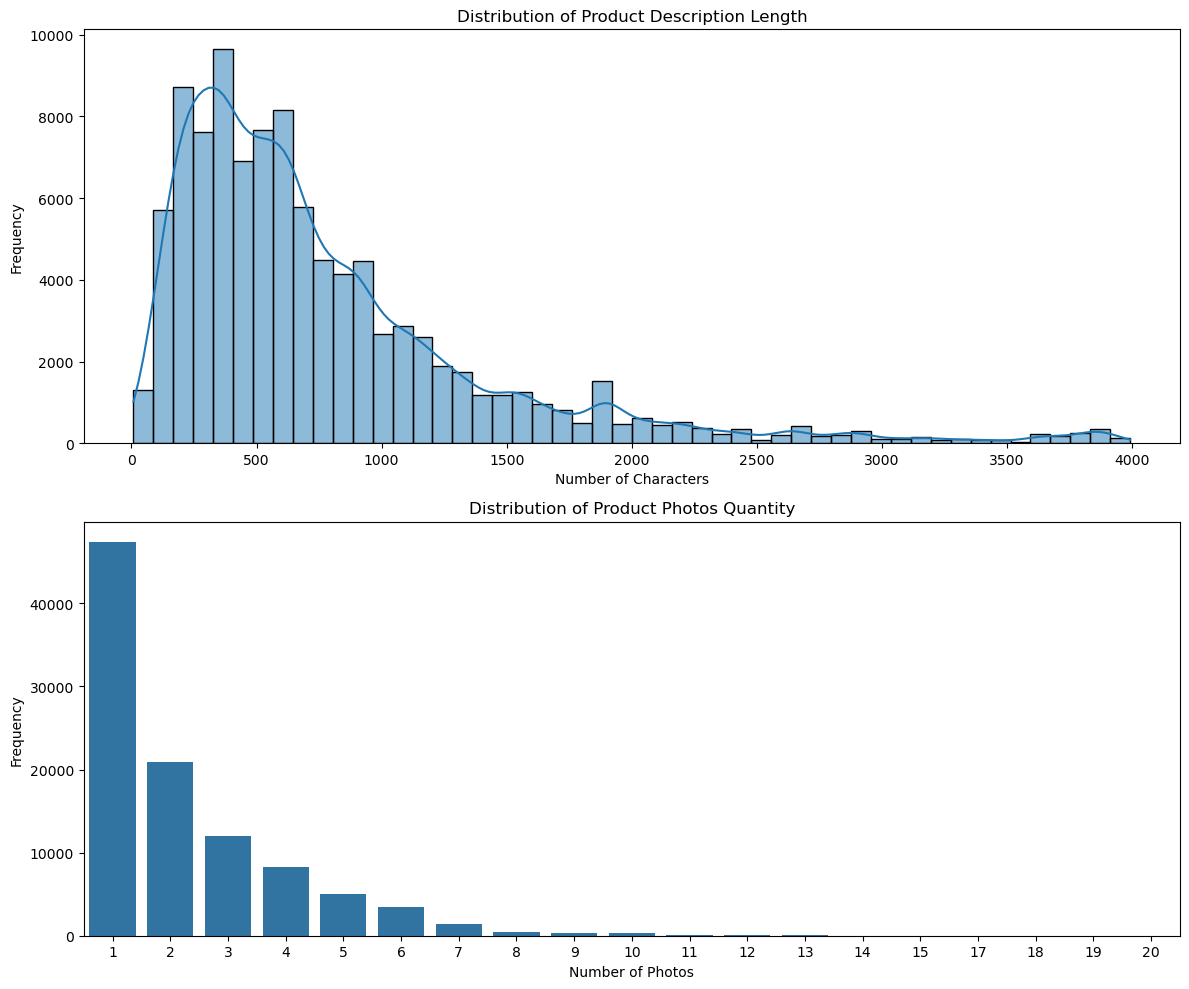

In [23]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.histplot(df1['product_description_lenght'].dropna(), bins=50, kde=True)
plt.title('Distribution of Product Description Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.countplot(data=df1, x='product_photos_qty')
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


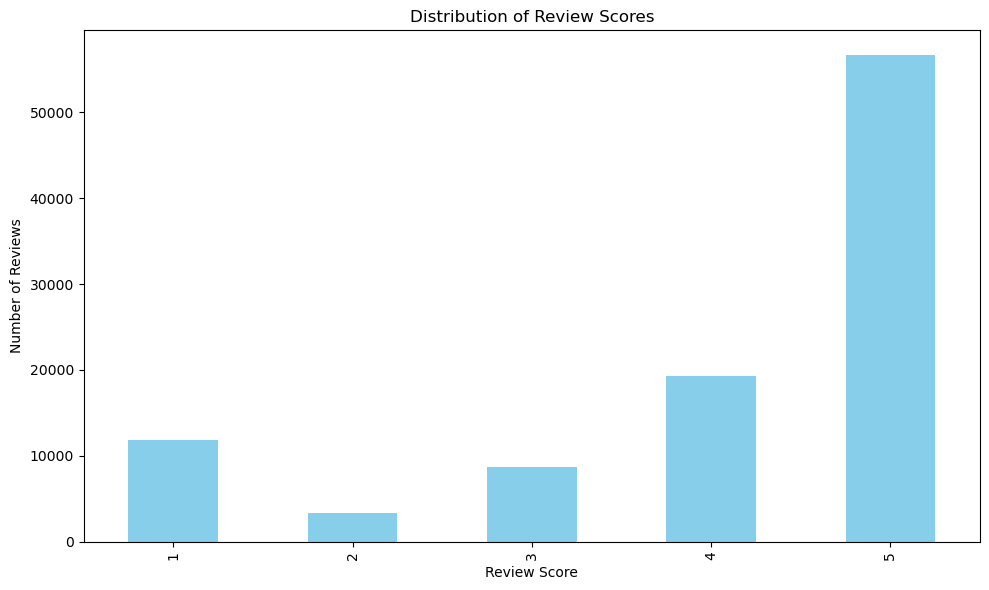

In [24]:
#review analysis
plt.figure(figsize=(10, 6))
review_counts = df1['review_score'].value_counts().sort_index()
review_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


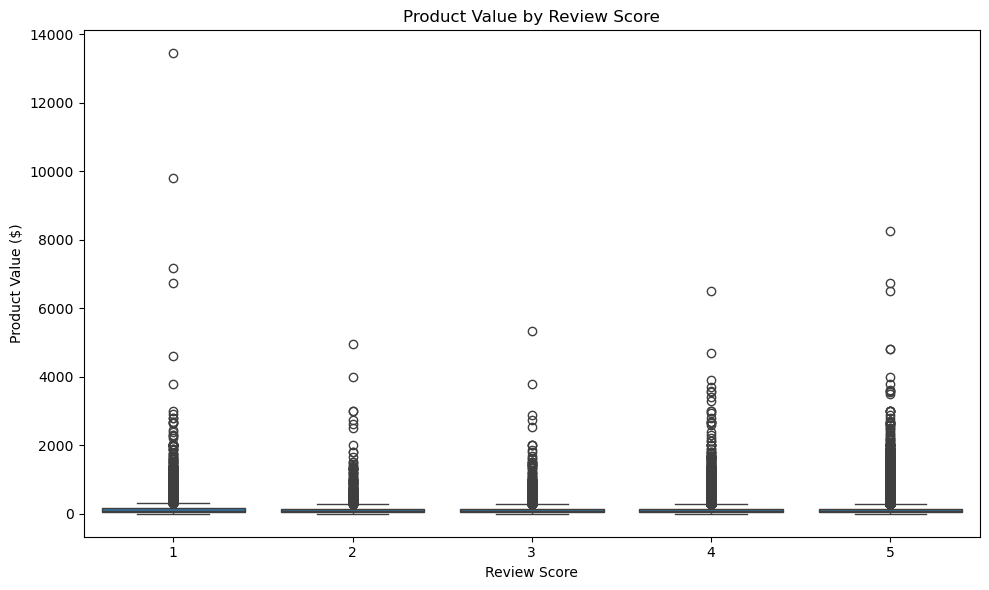

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='order_products_value', data=df1)
plt.title('Product Value by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Product Value ($)')
plt.tight_layout()
plt.show()


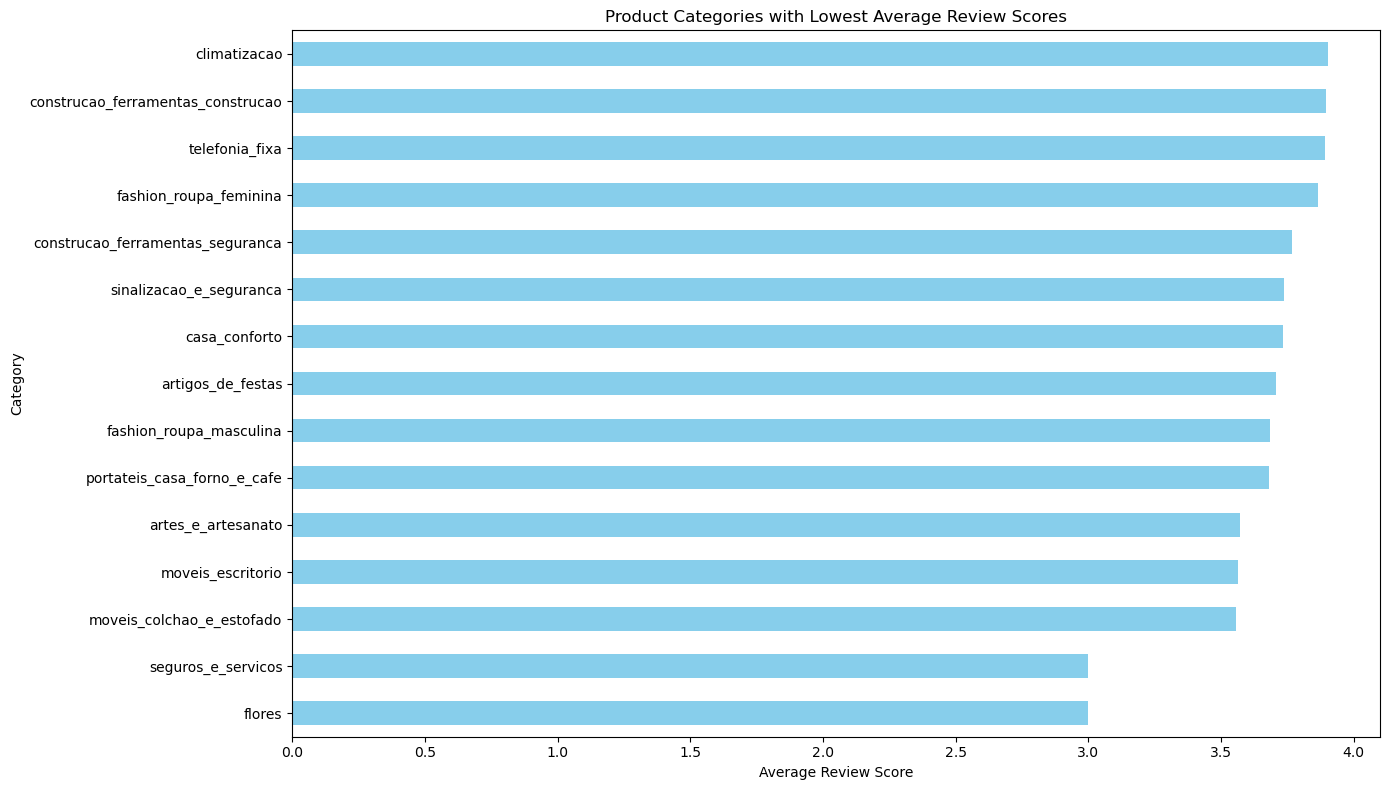

In [26]:
category_review = df1.groupby('product_category_name')['review_score'].mean().sort_values().head(15)
plt.figure(figsize=(14, 8))
category_review.plot(kind='barh', color='skyblue')
plt.title('Product Categories with Lowest Average Review Scores')
plt.xlabel('Average Review Score')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


## customer satisfaction

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_11680\1579099583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='review_score', data=df, palette='viridis')


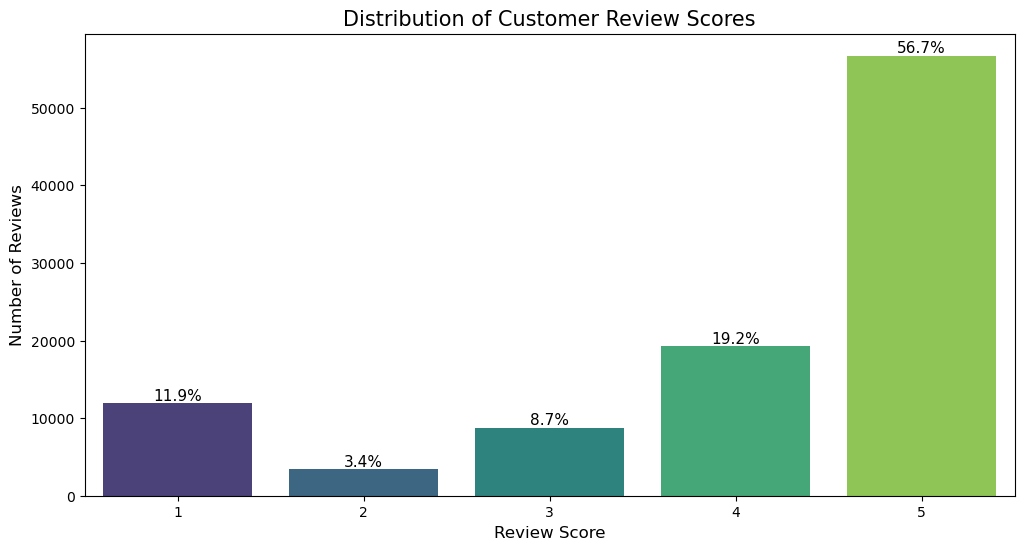

In [27]:
# Review score distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='review_score', data=df, palette='viridis')
plt.title('Distribution of Customer Review Scores', fontsize=15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Add percentage labels on bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)

plt.show()

In [28]:
review_percentage = df['review_score'].value_counts(normalize=True) * 100
print("Review Score Distribution:")
for score, percentage in review_percentage.sort_index().items():
    print(f"Score {score}: {percentage:.2f}%")

Review Score Distribution:
Score 1: 11.91%
Score 2: 3.41%
Score 3: 8.74%
Score 4: 19.25%
Score 5: 56.69%


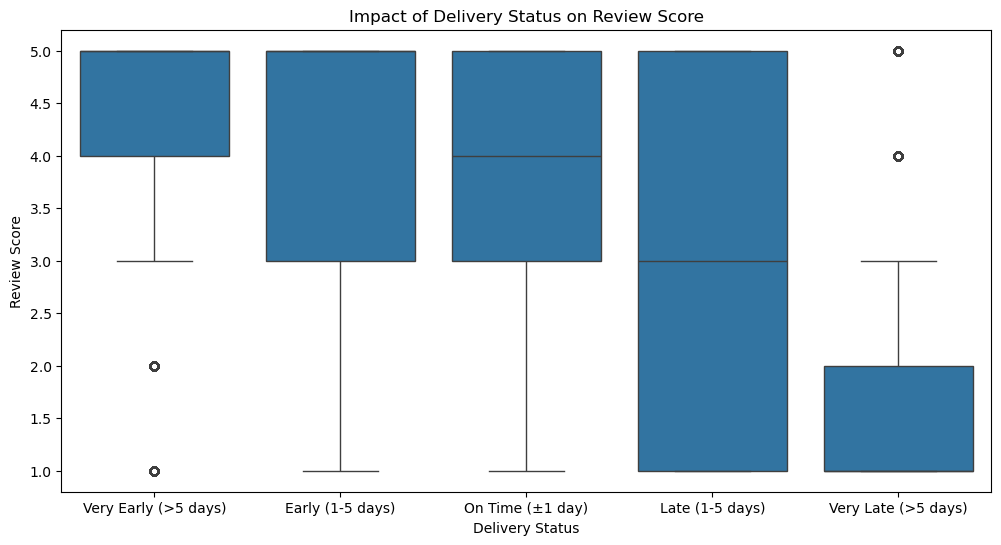

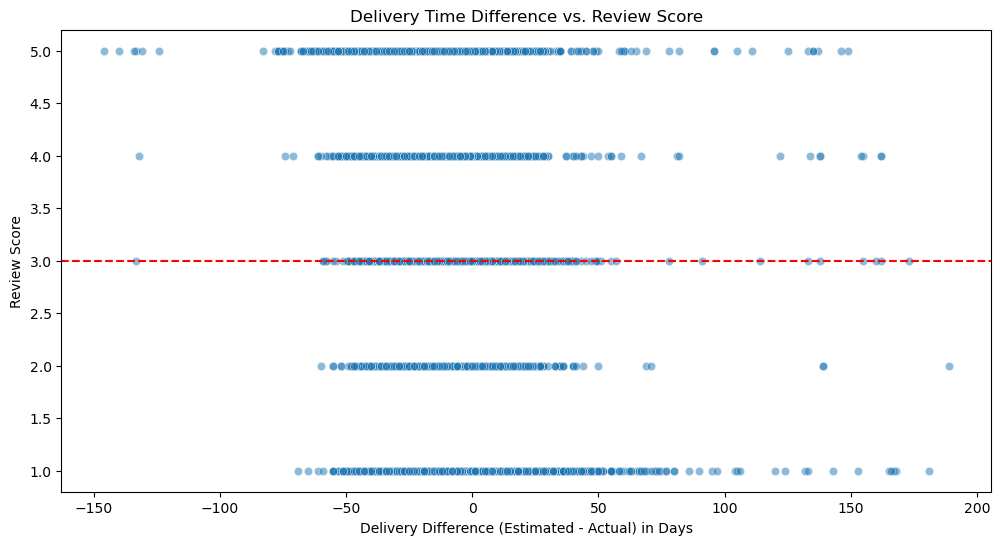


Average Review Score by Delivery Status:
        delivery_status  review_score
0  Very Early (>5 days)      4.255080
1      Early (1-5 days)      4.055329
2      On Time (±1 day)      3.968790
3       Late (1-5 days)      2.898734
4   Very Late (>5 days)      1.784467


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_11680\4005703861.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_delivery = df1.groupby('delivery_status')['review_score'].mean().reset_index()


In [29]:
# Analyze delivery status impact on satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x='delivery_status', y='review_score', data=df1)
plt.title('Impact of Delivery Status on Review Score')
plt.xlabel('Delivery Status')
plt.ylabel('Review Score')
plt.show()

# Delivery difference in days vs review score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='delivery_difference', y='review_score', data=df1, alpha=0.5)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Delivery Time Difference vs. Review Score')
plt.xlabel('Delivery Difference (Estimated - Actual) in Days')
plt.ylabel('Review Score')
plt.show()

# Average review score by delivery status
avg_score_by_delivery = df1.groupby('delivery_status')['review_score'].mean().reset_index()
print("\nAverage Review Score by Delivery Status:")
print(avg_score_by_delivery)

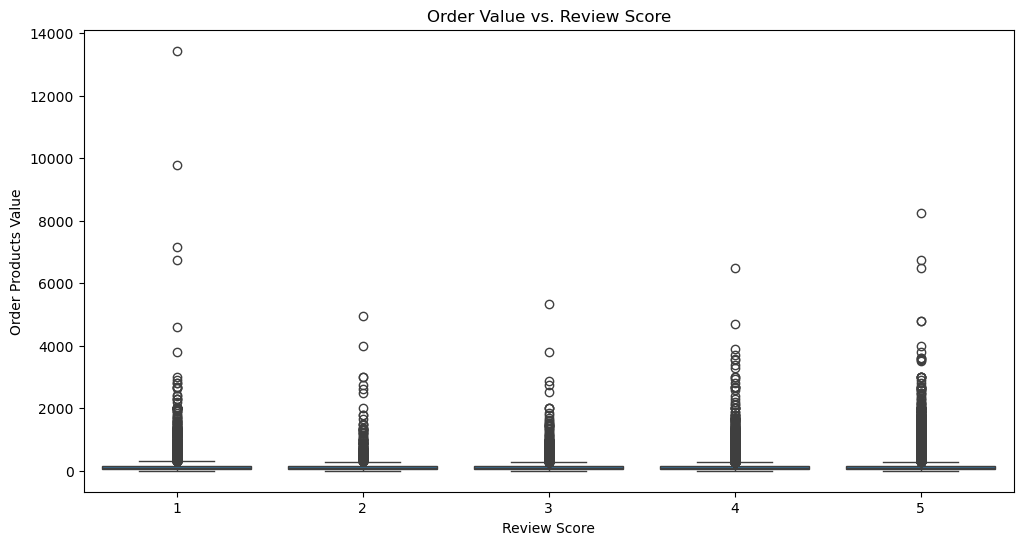

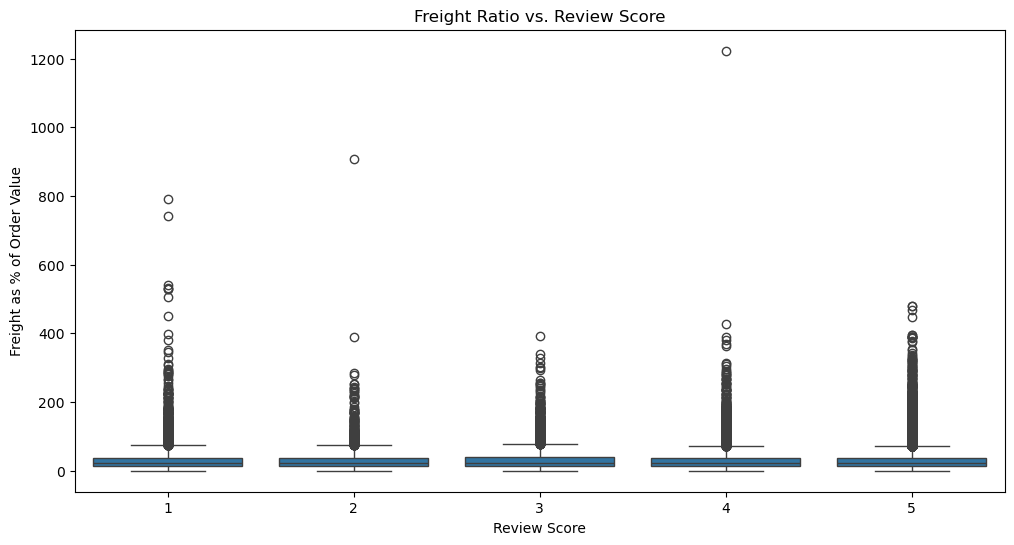

In [30]:
# Order value vs review score
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='order_products_value', data=df)
plt.title('Order Value vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Order Products Value')
plt.show()

# Freight value percentage vs review score
df['freight_ratio'] = df['order_freight_value'] / (df['order_products_value'] + 0.01) * 100
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='freight_ratio', data=df)
plt.title('Freight Ratio vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Freight as % of Order Value')
plt.show()

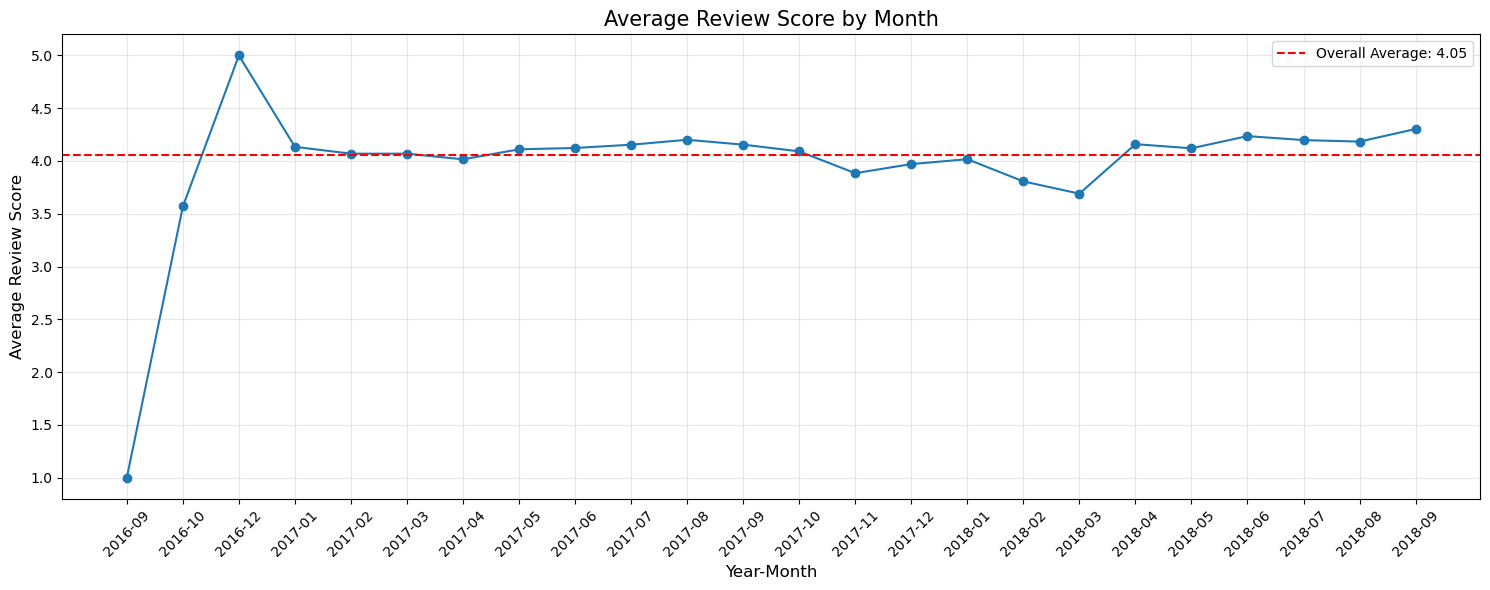

In [31]:
# Monthly trend in satisfaction
monthly_avg = df1.groupby(['purchase_year', 'purchase_month'])['review_score'].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['purchase_year'].astype(str) + '-' + monthly_avg['purchase_month'].astype(str).str.zfill(2)

plt.figure(figsize=(15, 6))
plt.plot(monthly_avg['year_month'], monthly_avg['review_score'], marker='o')
plt.axhline(y=df['review_score'].mean(), color='r', linestyle='--', label=f'Overall Average: {df["review_score"].mean():.2f}')
plt.title('Average Review Score by Month', fontsize=15)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Global Tech\AppData\Local\Temp\ipykernel_11680\3328784225.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_data['Correlation'], y=corr_data.index, palette='viridis')


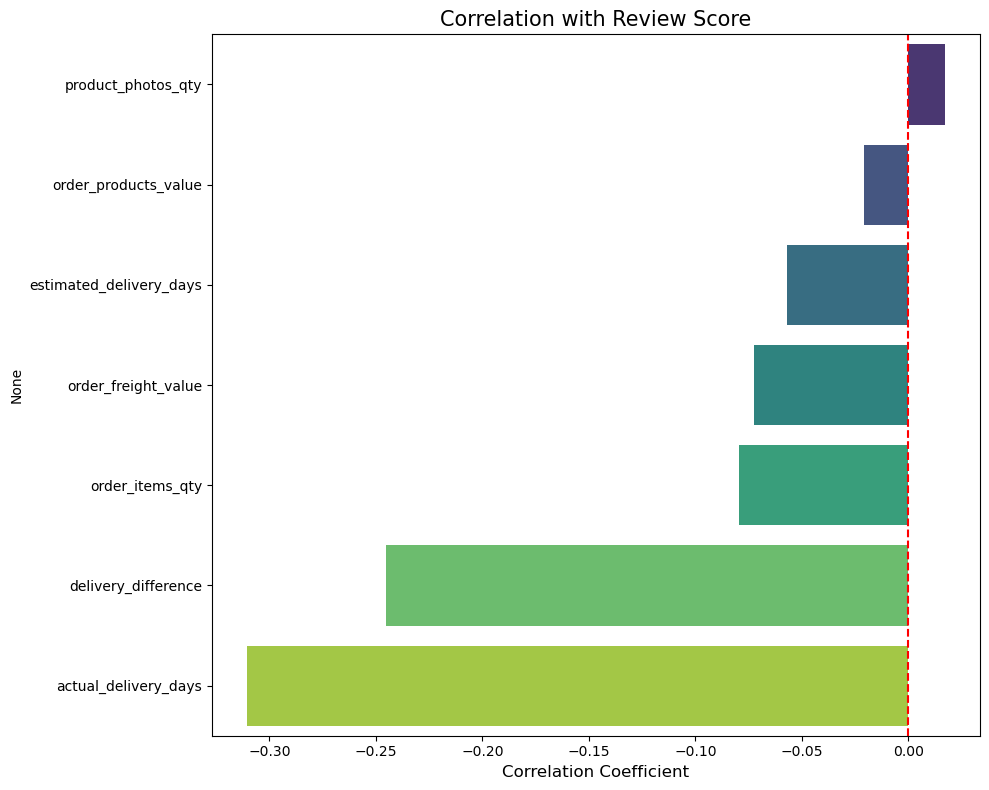

In [32]:
# Create correlation with review score
satisfaction_features = [
    'review_score', 'order_products_value', 'order_freight_value', 
    'order_items_qty', 'product_photos_qty', 'delivery_difference',
    'actual_delivery_days', 'estimated_delivery_days'
]

corr_matrix = df1[satisfaction_features].corr()['review_score'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
corr_data = pd.DataFrame({'Correlation': corr_matrix.drop('review_score')})
sns.barplot(x=corr_data['Correlation'], y=corr_data.index, palette='viridis')
plt.title('Correlation with Review Score', fontsize=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [33]:
## classification

In [34]:
import pandas as pd

# 🔹 Aggregate customer-level data
customer_summary = df1.groupby('customer_id').agg({
    'review_score': 'mean',  # Average review score per customer
    'delivery_difference': 'mean',  # Average delivery delay per customer
    'order_id': 'count'  # Number of orders per customer
}).reset_index()

# Define a new classification function
def classify_satisfaction(row):
    if row['review_score'] <= 2 or row['delivery_difference'] > 5:
        return 'Very Dissatisfied'
    elif row['review_score'] == 3:
        return 'Dissatisfied'
    elif row['review_score'] >= 4 and row['delivery_difference'] < 0:
        return 'Very Satisfied'
    else:
        return 'Satisfied'

# Apply classification at the customer level
customer_summary['satisfaction'] = customer_summary.apply(classify_satisfaction, axis=1)

# Merge back with the original data (optional)
df1 = df1.merge(customer_summary[['customer_id', 'satisfaction']], on='customer_id', how='left')
customer_summary.rename(columns={'satisfaction': 'y'}, inplace=True)
df1 = df1.merge(customer_summary[['customer_id', 'y']], on='customer_id', how='left')


In [35]:
df1['y'].value_counts()


y
Very Satisfied       72404
Very Dissatisfied    16090
Dissatisfied          8383
Satisfied             3123
Name: count, dtype: int64

In [36]:
df1['review_score'].isnull().sum()


0

# Feature Selection for Multiclass Classification of Customer Satisfaction**

## Objective
The goal of this classification task is to predict customer satisfaction (`y`), which is based on review scores and other factors. To improve model performance, we must carefully select features that contribute to this prediction while removing redundant or irrelevant columns.

##  Essential Columns 
These columns contain critical information for predicting customer satisfaction.

###  Target Variable
`y` → The classification label representing customer satisfaction (0 to 3). This is what the model will predict.

###  Customer and Order Identifiers
 `order_id` → Unique identifier for each order.
  `customer_id` → Unique identifier for each customer.

These columns are required for tracking orders but will not be used as features for prediction.

###  Review Information
`review_score` → The numeric rating given by the customer (1 to 5). A direct indicator of satisfaction.
  `review_comment_message` → Text feedback provided by the customer. This can be useful for sentiment analysis in more advanced models.

Since satisfaction is derived from review scores and comments, these features are crucial for the model.

###  Product Information
 `product_category_name` → The category of the purchased product. Some categories may have higher or lower satisfaction rates.
 `product_photos_qty` → The number of product images available. More images might lead to better customer confidence and satisfaction.

### Delivery and Performance Metrics
`actual_delivery_days` → The actual number of days it took to deliver the product.
- `delivery_difference` → The difference between estimated and **actual** delivery days. Delays might negatively impact satisfaction.

Delivery speed is often a key factor in customer experience, making these features important.



## Columns That Might Be Useful (Optional)
These columns are not strictly necessary but may provide additional insights.

`order_freight_value` → The shipping cost. Higher costs might affect satisfaction.
 `order_items_qty` → The number of items in the order. Could influence overall experience.
 `order_sellers_qty` → The number of sellers involved in the order. More sellers could increase complexity or delays.
  `comment_length` → The length of the customer’s review comment. Longer reviews might indicate stronger opinions.

These can be included in the model depending on their impact during feature selection.

---

## Dropped Columns (Not Needed)
These columns do not add value to classification or are redundant.

###  Redundant Date Columns
The dataset contains multiple **raw timestamps**, but we already have processed versions (`actual_delivery_days`, `delivery_difference`) that capture the necessary information.

- `order_purchase_timestamp`
- `order_aproved_at`
- `order_estimated_delivery_date`
- `order_delivered_customer_date`
- `review_creation_date`
- `review_answer_timestamp`

Instead of raw timestamps, we use derived metrics to simplify the model.

### Location-Based Data
Location data is not directly related to satisfaction unless the goal is **region-based analysis**.

- `customer_city`
- `customer_state`
- `customer_zip_code_prefix`

If regional trends are important, these could be reconsidered.

###  Identifiers Not Needed for Prediction
- `product_id`
- `review_id`

These are unique identifiers that do not influence satisfaction and should be removed.

---

##  Final Feature Selection
After removing unnecessary columns, the dataset should be reduced to **only relevant variables**:

columns_to_keep = [
    'order_id', 'customer_id', 'review_score', 'review_comment_message', 
    'product_category_name', 'product_photos_qty', 'actual_delivery_days',
    'delivery_difference', 'y'
]



In [37]:
columns_to_keep = [
    'order_id', 'customer_id', 'review_score', 'review_comment_message', 
    'product_category_name', 'product_photos_qty', 'actual_delivery_days',
    'delivery_difference', 'y'
]

In [38]:
df2 = df1[columns_to_keep]
df2.head()

,order_id,customer_id,review_score,review_comment_message,product_category_name,product_photos_qty,actual_delivery_days,delivery_difference,y
0,b95df3cef5297e79ef709ba256518f6f,297dcf281305aabfee256d313076af2b,5,No review message,beleza_saude,1,5.0,-37.0,Very Satisfied
1,59af46052a799e80e2f0c665c587731d,b7563d94162ed0aa3f8d9cada4bcc536,5,entrega em 2 dias produto c boa qualidade otim...,informatica_acessorios,2,4.0,-18.0,Very Satisfied
2,a3e6136894621db402a772c6bc72a12a,f102cb15ec41ca30fa2902da06495f6b,5,produto veio antes do prazo informado muito ob...,automotivo,1,6.0,-29.0,Very Satisfied
3,b675ea5a618922f6e679e30531b8957b,e33c250311160298e5b457ca52720a35,4,No review message,cama_mesa_banho,1,23.0,1.0,Satisfied
4,195a8be6794c487fe6cfbb97b7c61902,8a8f7c9a4450f17ba3ee25a5ba821bc7,5,No review message,moveis_decoracao,2,14.0,-19.0,Very Satisfied


In [39]:
df2.columns 

Index(['order_id', 'customer_id', 'review_score', 'review_comment_message',
       'product_category_name', 'product_photos_qty', 'actual_delivery_days',
       'delivery_difference', 'y'],
      dtype='object')

In [40]:
df2.head()

,order_id,customer_id,review_score,review_comment_message,product_category_name,product_photos_qty,actual_delivery_days,delivery_difference,y
0,b95df3cef5297e79ef709ba256518f6f,297dcf281305aabfee256d313076af2b,5,No review message,beleza_saude,1,5.0,-37.0,Very Satisfied
1,59af46052a799e80e2f0c665c587731d,b7563d94162ed0aa3f8d9cada4bcc536,5,entrega em 2 dias produto c boa qualidade otim...,informatica_acessorios,2,4.0,-18.0,Very Satisfied
2,a3e6136894621db402a772c6bc72a12a,f102cb15ec41ca30fa2902da06495f6b,5,produto veio antes do prazo informado muito ob...,automotivo,1,6.0,-29.0,Very Satisfied
3,b675ea5a618922f6e679e30531b8957b,e33c250311160298e5b457ca52720a35,4,No review message,cama_mesa_banho,1,23.0,1.0,Satisfied
4,195a8be6794c487fe6cfbb97b7c61902,8a8f7c9a4450f17ba3ee25a5ba821bc7,5,No review message,moveis_decoracao,2,14.0,-19.0,Very Satisfied


In [41]:
df3 = df2.copy()

# feature Engineer

In [42]:
df3.drop(columns=['order_id', 'customer_id'], inplace=True)

In [43]:
from textblob import TextBlob

df3['review_sentiment'] = df3['review_comment_message'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df3['is_negative_review'] = (df3['review_sentiment'] < 0).astype(int)  


In [44]:
# Delivery-related features
df3['late_delivery'] = (df3['delivery_difference'] > 0).astype(int)
df3['delivery_speed'] = pd.cut(df3['actual_delivery_days'], bins=[0, 5, 10, 100], labels=['Fast', 'Normal', 'Slow'])

# High-risk product categories
high_risk_categories = ['electronics', 'furniture', 'computers_accessories']
df3['high_risk_product'] = df3['product_category_name'].isin(high_risk_categories).astype(int)

# Product photo analysis
df3['low_photo_count'] = (df3['product_photos_qty'] < 2).astype(int)


# Check class distribution
print(df3['y'].value_counts(normalize=True) * 100)

# Display final dataset structure
print(df3.head())

y
Very Satisfied       72.404
Very Dissatisfied    16.090
Dissatisfied          8.383
Satisfied             3.123
Name: proportion, dtype: float64
   review_score                             review_comment_message  \
0             5                                  No review message   
1             5  entrega em 2 dias produto c boa qualidade otim...   
2             5  produto veio antes do prazo informado muito ob...   
3             4                                  No review message   
4             5                                  No review message   

    product_category_name  product_photos_qty  actual_delivery_days  \
0            beleza_saude                   1                   5.0   
1  informatica_acessorios                   2                   4.0   
2              automotivo                   1                   6.0   
3         cama_mesa_banho                   1                  23.0   
4        moveis_decoracao                   2                  14.0   

   de

In [45]:
print(df3.columns)


Index(['review_score', 'review_comment_message', 'product_category_name',
       'product_photos_qty', 'actual_delivery_days', 'delivery_difference',
       'y', 'review_sentiment', 'is_negative_review', 'late_delivery',
       'delivery_speed', 'high_risk_product', 'low_photo_count'],
      dtype='object')


In [46]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(cat1, cat2):
    """Calculate Cramér's V statistic for categorical features."""
    confusion_matrix = pd.crosstab(cat1, cat2)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Select categorical features
categorical_features = df3.select_dtypes(include=['object', 'category']).columns

# Compute Cramér's V for each categorical feature vs. y
cramers_v_results = {col: cramers_v(df3[col], df3['y']) for col in categorical_features}

# Convert to DataFrame
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramers_V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers_V', ascending=False)

# Display results
print(cramers_v_df)


                        Cramers_V
y                        1.000000
review_comment_message   0.680927
delivery_speed           0.154425
product_category_name    0.060793


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_11680\4027428434.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


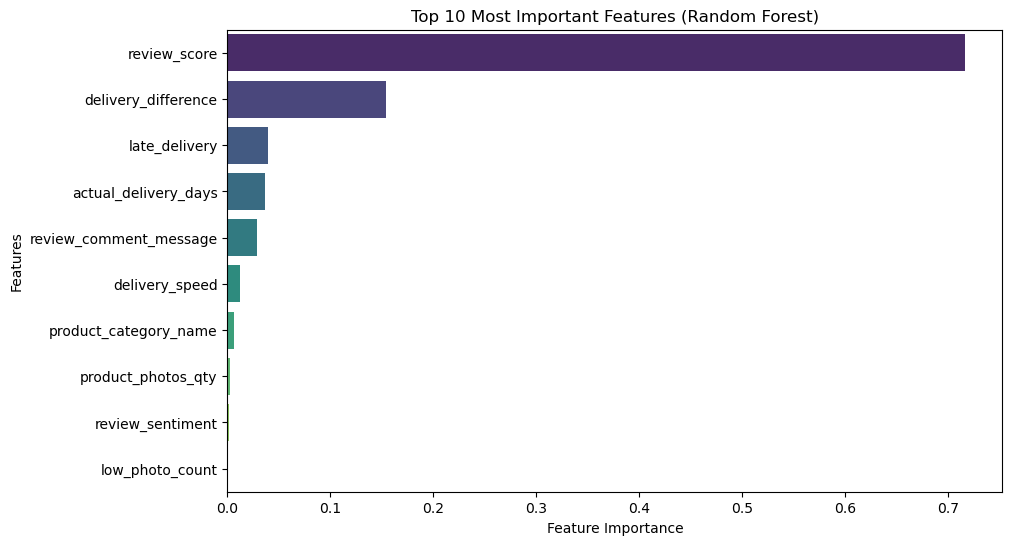

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# 🔹 Ensure no whitespace issues in column names
df3.columns = df3.columns.str.strip()

# 🔹 Ensure 'y' exists
if 'y' not in df3.columns:
    raise ValueError("Column 'y' is missing! Available columns:", df3.columns)

# Separate features and target
X = df3.drop(columns=['y'])
y = df3['y']

# Handle categorical variables
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Convert categorical features to numeric using Label Encoding
X_encoded = X.copy()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le  

# Choose model type (classification or regression)
if y.dtype == 'object' or df3['y'].nunique() < 10: 
    y = LabelEncoder().fit_transform(y)  
    model = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
model.fit(X_encoded, y)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#  Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()


In [48]:
top_4_features = feature_importance_df.head(4)
print(top_4_features)


Index(['review_score', 'review_comment_message', 'product_category_name',
       'product_photos_qty', 'actual_delivery_days', 'delivery_difference',
       'y', 'review_sentiment', 'is_negative_review', 'late_delivery',
       'delivery_speed', 'high_risk_product', 'low_photo_count'],
      dtype='object')

In [51]:
df4 = df3[['review_score', 'delivery_difference', 'late_delivery', 'actual_delivery_days','y']].copy()
df4.head()


,review_score,delivery_difference,late_delivery,actual_delivery_days,y
0,5,-37.0,0,5.0,Very Satisfied
1,5,-18.0,0,4.0,Very Satisfied
2,5,-29.0,0,6.0,Very Satisfied
3,4,1.0,1,23.0,Satisfied
4,5,-19.0,0,14.0,Very Satisfied


# model

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

#  Ensure no whitespace issues in column names
df4.columns = df4.columns.str.strip()

# 🔹 Encode target variable if it's categorical
if df4['y'].dtype == 'object':
    le = LabelEncoder()
    df4['y'] = le.fit_transform(df4['y'])

#  Split data into features (X) and target (y)
X = df4.drop(columns=['y'])
y = df4['y']

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define and Train XGBoost Model
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

#  Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9958
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1676
           1       0.99      0.93      0.96       625
           2       0.99      1.00      0.99      3218
           3       1.00      1.00      1.00     14481

    accuracy                           1.00     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       1.00      1.00      1.00     20000



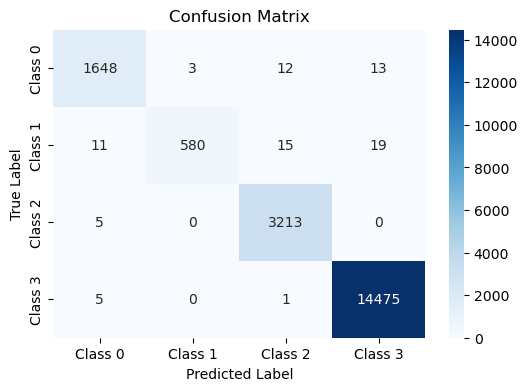

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99      1676
     Class 1       0.99      0.93      0.96       625
     Class 2       0.99      1.00      0.99      3218
     Class 3       1.00      1.00      1.00     14481

    accuracy                           1.00     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       1.00      1.00      1.00     20000



C:\Users\Global Tech\AppData\Local\Temp\ipykernel_11680\1319739171.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


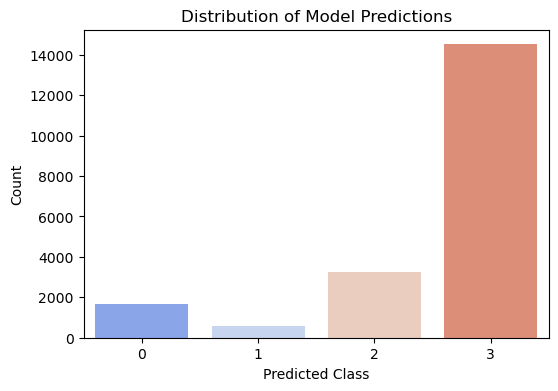

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique class labels from y_test
unique_classes = sorted(set(y_test))  # Ensures correct order
class_labels = [f"Class {c}" for c in unique_classes]  # Dynamically create labels

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#  Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
report = classification_report(y_test, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

#  Bar Plot of Predictions per Class
plt.figure(figsize=(6,4))
sns.countplot(x=y_pred, palette='coolwarm')
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Distribution of Model Predictions")
plt.show()
